        Batch, mini batch and Stochastic grandient descents theory      

Stochastic and Batch Gradient and Mini Batch Descent in python

We will use very simple home prices data set to implement batch and stochastic gradient descent in python.

1. Batch gradient descent uses all training samples in forward pass to calculate cumulitive error and than we adjust weights using derivaties.
2. In stochastic GD, we **randomly pick one training sample**(yad rkhna only one), perform forward pass, compute the error and immidiately adjust weights.
3. In mini-batch gradient descent, instead of using all the training samples at once (batch gradient descent) or just one (stochastic gradient descent), we divide the training data into small batches of a predetermined size. These batches are then used in the forward pass to calculate the cumulative error, and the weights are adjusted based on the average error from that batch.

- The key difference lies in the data usage for weight adjustment: batch gradient descent employs all training samples, stochastic gradient descent uses one randomly selected sample, and mini-batch gradient descent leverages small subsets (mini-batches) of the training data for weight adjustments.

Remember

In stochastic gradient descent (SGD), the one sample picked for training typically changes in each epoch. An epoch refers to one complete pass of the entire dataset through the model during the training process.

In each epoch of SGD, a new random sample from the dataset is generally chosen for training. This randomness helps in introducing variety to the training process, preventing the model from being biased by the order of the samples. By using different samples in each epoch, the model gets exposed to various data points, which aids in better generalization and prevents the model from getting stuck in local minima.

Similarly in minibatch GD also,  randomly picked samples(mini batches) changes in each epochs to cover all the datapoints efficiently

**Mini-Batch Gradient Descent**

In MBGD, the training set is divided into small batches of data points, and the model parameters are updated using the average gradient of each batch.

**Stochastic vs mini batch**

In Stochastic Gradient Descent (SGD), the model parameters are updated using the gradient of a **single randomly selected data point** from the training set ¹. For example, if we have a training set of 1000 data points, we would randomly select one data point and use its gradient to update the model parameters. This process is repeated for each data point in the training set until convergence ¹(very important, picking one datapoint randomly, untill convergence).

In contrast, in Mini-Batch Gradient Descent (MBGD), the training set is divided into small batches of data points, and the model parameters are updated using the **average gradient of each batch** ¹. For example, if we have a training set of 1000 data points and we divide it into batches of 10 data points, we would use the average gradient of each batch to update the model parameters. This process is repeated for each batch in the training set until convergence ¹.


so 1. Batch Gradient Descent(all datapoints each times), 2. Mini batch(pretuned fixed number of random datapoints each times), 3. Stochastic GD's(only one random datapoint each times) me difference

**the number of data points used to calculate the gradient**. BGD uses the entire dataset to calculate the gradient, while SGD uses only one data point. MBGD uses a small batch of data points to calculate the gradient, which reduces the variance of the gradient and is computationally efficient. The size of the mini-batch is a hyperparameter that can be tuned to improve the performance of the model.

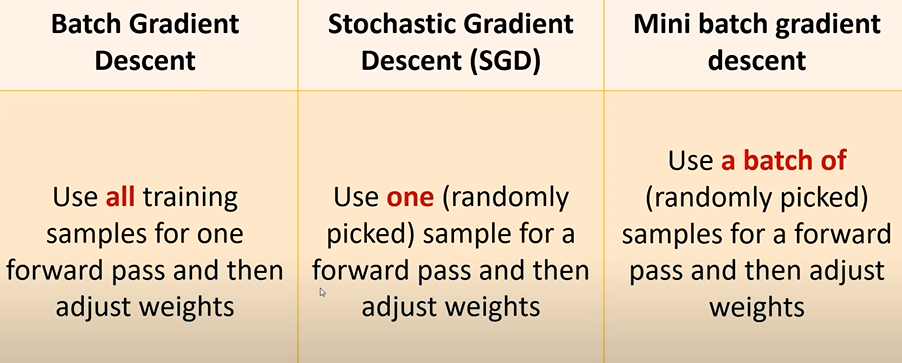

# Now Coding Implementation of all the three one by one

on banglore house prizing dataset

y(i.e. price of house) = w1 \* area + w2 \* bedrooms + bias

using loss function = mean square error

dw = d(loss function) wrt d(w) , here d is partial derivative, similarly for b also

# 1. Stochastic Gradient Descent

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("/content/homeprices_banglore.csv")

In [3]:
df.sample(5)

,area,bedrooms,price
15,1175,2,42.0
19,800,1,32.0
12,1000,2,38.0
3,1521,3,75.0
7,3300,4,155.0


Preprocessing/Scalling : since our columns are on different scale, it is important to perform scaling on them

In [4]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()
# created two instances of MinMax Function from sklearn
# remember minmax scaler apply krne se values 0 se 1 ke beech aa jati hain us column ki

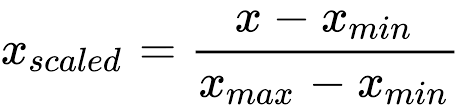

In [16]:
scaled_x = sx.fit_transform(df.drop('price',axis = 'columns'))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
#  fit_transform() = fit a transformer and transform the data in a single step.

In scikit-learn (sklearn), `fit()` and `fit_transform()` are methods commonly used in the context of transformers and models.

1. **`fit()` method:**
   - Used to compute the necessary parameters needed to perform a transformation or fit a model to the data.
   - For transformers, like those used in preprocessing (e.g., scaling, encoding), calling `fit()` computes and stores the necessary parameters based on the data provided.
   - For models, calling `fit()` trains the model on the provided data.

   Example with a transformer:
   ```python
   from sklearn.preprocessing import StandardScaler

   data = [[1, 2], [3, 4], [5, 6]]
   scaler = StandardScaler()

   # Compute mean and standard deviation based on the data
   scaler.fit(data)
   ```

   Example with a model:
   ```python
   from sklearn.linear_model import LinearRegression

   X = [[1, 2], [3, 4]]
   y = [5, 6]
   model = LinearRegression()

   # Train the model on the provided data
   model.fit(X, y)
   ```

2. **`fit_transform()` method:**
   - Used specifically for transformers to apply the transformation to the data.
   - It combines the steps of fitting the transformer and transforming the data in a single step.
   - It's more efficient than calling `fit()` followed by `transform()` separately.

   Example:
   ```python
   from sklearn.preprocessing import StandardScaler

   data = [[1, 2], [3, 4], [5, 6]]
   scaler = StandardScaler()

   # Fit the scaler and transform the data in a single step
   scaled_data = scaler.fit_transform(data)
   ```

   Note:** `fit_transform()` should only be used on the training data.** When you have separate training and testing datasets, you should fit the transformer on the training data and then use the fitted transformer to transform both the training and testing data.

In summary, **use `fit()` when you need to compute parameters or train a model, and use `fit_transform()` when you want to both fit a transformer and transform the data in a single step**. For models, you typically just use `fit()`.

In [6]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [17]:
df['price'].values.reshape(df.shape[0],1) # us np 1D array ko 2D dataframe me reshape krna : df.shape[0] = number of rows in df, ke barabar rows new 2D dataframe me honi chahiye and 1 = 1 column ho na chahiye
# df['price'].values => list to np array of the price column by .values function/extention
# df['price'] => one list of all values in price column

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

df['price'] is 1D array. scaler.fit_transform() expects a 2D array as input. so input me ek operation krke, 2D array ko pass kiya gya hai



Absolutely, let's break down the code `df['price'].values.reshape(df.shape[0], 1)` step by step:

1. `df['price']`: This selects the 'price' column from the DataFrame `df`. It's a Pandas Series.

2. `.values`: Converts the Pandas Series to a NumPy array. This is often done because many numerical operations and transformations in Python are more efficiently performed using NumPy arrays.

3. `.reshape(df.shape[0], 1)`: Reshapes the NumPy array into a 2D array. The number of rows in the reshaped array is given by `df.shape[0]` (the number of rows in the original DataFrame), and there is only one column (specified by `1`).

So, in short, this line of code takes the 'price' column from the DataFrame, converts it into a NumPy array, and then reshapes it into a 2D array with a single column and a number of rows equal to the number of rows in the original DataFrame.

In [18]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

We should convert target column (i.e. price) into one dimensional array. It has become 2D due to scaling that we did above but now we should change to 1D

In [19]:
scaled_y.reshape(20,) # used for 2D to 1D array conversion

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [21]:
scaled_y # still it is 2D omly
print(scaled_y)

[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]
 [0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]
 [0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]
 [0.51851852]
 [0.        ]]


1. Batch Gradient Descent, on y(i.e. price of house) = w1 * area + w2 * bedrooms + bias

Batch : all datapoints lena

In [45]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
  number_of_features = X.shape[1] # i.e. number of columns in X i.e. training dataframe(label rahit).
  # in our case number of features = 2(area,bedroom)
  w = np.ones(shape = (number_of_features)) # all weights intitialized with 1
  b = 0
  total_samples = X.shape[0] # number of rows in X

  # storing to draww the graph between cost and epochs
  cost_list = []
  epoch_list = []

  for i in range(epochs):
    y_pred = np.dot(w, X.T) + b

    # remember these are gradients when cost function ka weights and bias ke sath partial derivative liya jaye
    # assumed cost function is MSE
    w_grad = - (2/total_samples)*(X.T.dot(y_true-y_pred))
    b_grad = - (2/total_samples)*np.sum(y_true - y_pred)

    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad

    cost = np.mean(np.square(y_true-y_pred)) # MSE(mean square error)

    # if i%2 == 0 :
    cost_list.append(cost)
    epoch_list.append(i)

  return w,b,cost,cost_list,epoch_list # for be bahar rkhna return, nhi to bs 1-1 elements append honge list me , no convergence too



In [46]:
w, b , cost, cost_ls, epoch_ls = batch_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0],),500)

In [47]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [50]:
epoch_ls, cost_ls

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

hence, training data se we got, w1 = 0.7071, w2 = 0.6745, b = -0.2303.., cost = 0.0068

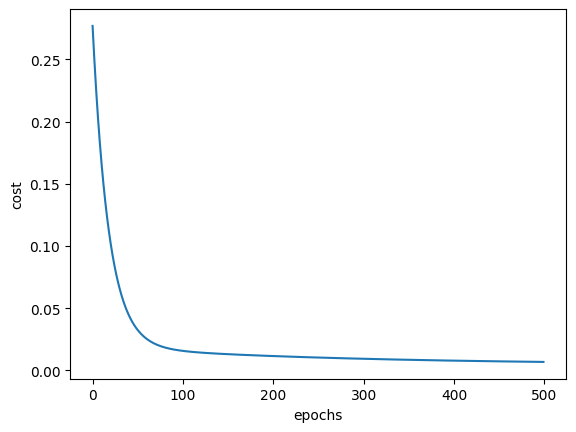

In [49]:
# plotting the epochs vs cost reduction
plt.xlabel('epochs')
plt.ylabel("cost")
plt.plot(epoch_ls,cost_ls)

Let's do some predictions now

In [51]:
def predict(area, bedrooms, w, b):
  scaled_x = sx.transform([[area,bedrooms]])[0] # scaled x is 2D arrya, we want its one row only
    # here w1 = w[0] , w2 = w[1], w3 = w[2] and bias is b
    # equation for price is w1*area + w2*bedrooms + w3*age + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    # scaled_X[2] is age
  scaled_price = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b
  # once we get price prediction we need to to rescal it back to original value
  # also since it returns 2D array, to get single value we need to do value[0][0]
  return sy.inverse_transform([[scaled_price]])[0][0] # min-max normalization se again original valuee pr jana


In [52]:
predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [53]:
predict(1000,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [54]:
predict(1500,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

2. Stochastic Gradient Descent(only 1 random sample) Implementation

Stochastic GD will use randomly picked single training sample to calculate error and using this error we backpropage to adjust weights

In [56]:
import random
random.randint(0,6) # 0 se 6 ke beech any random number will be picked . 0,6 both included

4

In [65]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1] # i.e. 2 . number_of_feature in single integer variable
    w = np.ones(shape=(number_of_features))
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
      random_index = random.randint(0,total_samples-1) # since last index bhi included hota hai
      sample_x = X[random_index]
      sample_y = y_true[random_index]

      y_pred = np.dot(w, sample_x.T) + b  # instead of X, sample_x kr do

      # remember these are gradients when cost function ka weights and bias ke sath partial derivative liya jaye
      # assumed cost function is MSE
      w_grad = - (2/total_samples)*(sample_x.T.dot(sample_y-y_pred)) # y_true ki jagah sample_y, X ki jagah sample_x
      b_grad = - (2/total_samples)*(sample_y - y_pred) # ek ke liye no sum : no need numpy array

      w = w - learning_rate * w_grad
      b = b - learning_rate * b_grad

      cost = np.square(sample_y-y_pred) # MSE(mean square error). but mean yhan no nee as n=1

      if i%100 == 0 :
        cost_list.append(cost)
        epoch_list.append(i)

    return w,b,cost,cost_list,epoch_list


In [66]:
w_sgd, b_sgd, cost_sgd, cost_lis, epoch_lis =  stochastic_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],),10000)

In [67]:
w_sgd, b_sgd, cost_sgd

(array([0.71066551, 0.67643037]), -0.23354650057643056, 0.0025235509467841175)

In [68]:
# purana batch gd se
w,b,cost  # almost similar results

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

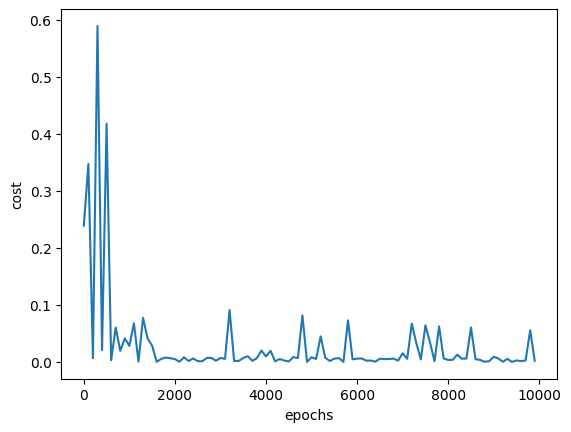

In [69]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_lis,cost_lis)

3. Mini Batch Gradient Descent

Mini batch GD: we use a batch of m samples where 0 < m < n (where n is total number of training samples)

In [72]:
np.random.permutation(20)
# creates a random permutation of the integers from 0 to 19 (inclusive). It returns a shuffled version of the array or a range.
# every time differnt permutation eg these 20 numbers(0,1,2,3....,19)

array([ 2,  7, 13,  6, 11, 18, 14,  8,  5,  0, 16, 12, 19,  3,  4, 17, 10,
       15,  1,  9])

In [75]:
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [78]:
number_of_features = scaled_x.shape[1]
number_of_features

2

In [79]:
www = np.ones(shape = (number_of_features))
www

array([1., 1.])

In [84]:
def MBGD(X, y_true, epochs=100,batch_size=5,learning_rate=0.01):

  number_of_features = X.shape[1]  # i.e. 2

  w = np.ones(shape = (number_of_features)) # 1d array of size equal to number of features, all values equal to 1
  b = 0
  total_samples = X.shape[0] # number of rows in X

  if batch_size > total_samples: # in this case MBGD becomes BGD
    batch_size = total_samples

  cost_list = []
  epoch_list = []

  num_batches = int(total_samples/batch_size)

  for i in range(epochs):
    random_indices = np.random.permutation(total_samples)
    x_tmp = X[random_indices]
    y_tmp = y_true[random_indices]

    for j in range(0, total_samples, batch_size):
      xj = x_tmp[j:j+batch_size]
      yj = y_tmp[j:j+batch_size]
      y_pred = np.dot(w, xj.T) + b # similar to first or BGT, operations honge

      w_grad = -(2/len(xj))*(xj.T.dot(yj-y_pred))
      b_grad = -(2/len(xj))*np.sum(yj-y_pred)

      w = w - learning_rate*w_grad
      b = b - learning_rate*b_grad

      cost = np.mean(np.square(yj-y_pred)) # MSE

    if i%10 == 0 :
      cost_list.append(cost)
      epoch_list.append(i)

  return w,b,cost,cost_list, epoch_list


In [85]:
w, b, cost, cost_l, epoch_l = MBGD(
    scaled_x,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs=120,
    batch_size = 5
)
w,b,cost

(array([0.71017901, 0.67809463]), -0.23329544776553657, 0.008732530436317644)

again almost similar result as BGD, SGD, MBGD in all the three. Just trial and error se epochs different honge.

Now plot epoch vs cost graph to see how cost reduces as number of epoch increases

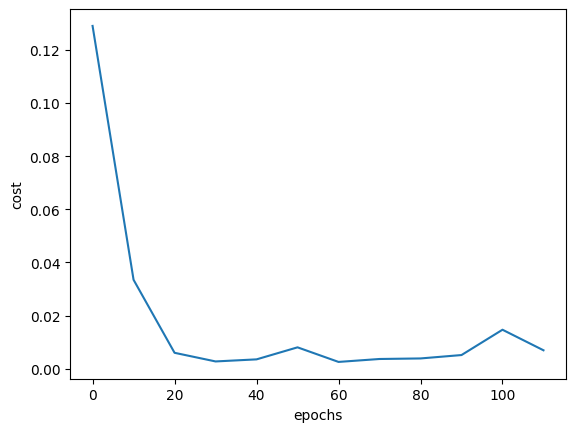

In [86]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_l,cost_l)

Let's do some prediction now

In [87]:
def predict(area, bedrooms, w,b):
  scaled_x = sx.transform([[area,bedrooms]])[0]
  scaled_y = w[0]*scaled_x[0] + w[1]*scaled_x[1] + b # that is nothing but price/label only
  return sy.inverse_transform([[scaled_y]])[0][0] # sy was fitted and transformed on labels., re reverse transform me sy ko use krenge

In [88]:
predict(2600,4,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.67029982553467

In [89]:
predict(1000,2,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.002819957797698

In [90]:
predict(1500,3,w,b)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.41854262780451